In [3]:
import os
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [4]:
def obdobi(radek):
    return f"""{radek['odjezd'].dayofweek + 1}-{radek['odjezd'].hour // 4}"""

In [5]:
df = pd.read_parquet(os.path.join('data','jizdenky.parquet'))
df = df[df['odkud'].str.contains('Ostrava') | df['odkud'].str.contains('Praha')]
df = df[df['kam'].str.contains('Ostrava') | df['kam'].str.contains('Praha')]
df = df[df['odjezd'] >= '2024-11-08']
df = df[df['prostredek'] != 'autobus']
df = df[df['prestupy'] == 0]
nejdelsi = df['jizdni_doba'].quantile(0.95)
print(f"Nejdelší započítané spojení: {int(nejdelsi)} minut.")
df = df[df['jizdni_doba'] <= nejdelsi]
df['spoj'] = df.apply(lambda row: f"""{row['prodejce']} {row['den']} {row['odjezd'].hour:02}:{row['odjezd'].minute:02}""", axis=1)
df['obdobi'] = df.apply(lambda row: obdobi(row), axis=1)

Nejdelší započítané spojení: 216 minut.


In [6]:
df = df[df['predstih_h'] <= 4]
df = df[df['predstih_h'] >= 0]

In [7]:
prgova = df[df['odkud'].str.contains('Pra') & df['kam'].str.contains('Ostra')]

In [8]:
ovaprg = df[df['odkud'].str.contains('Ostra') & df['kam'].str.contains('Pra')]

<Axes: xlabel='obdobi'>

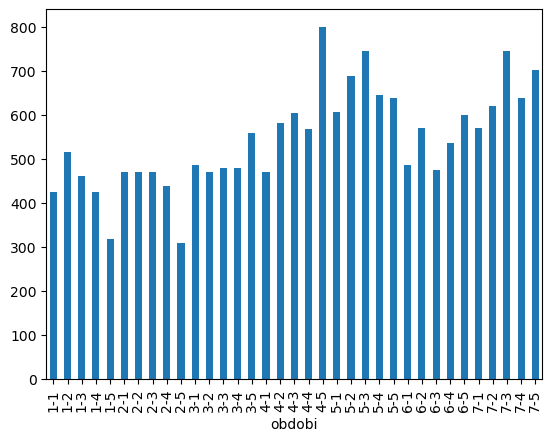

In [9]:
prgova.groupby('obdobi')['cena'].median().plot.bar()

<Axes: xlabel='obdobi'>

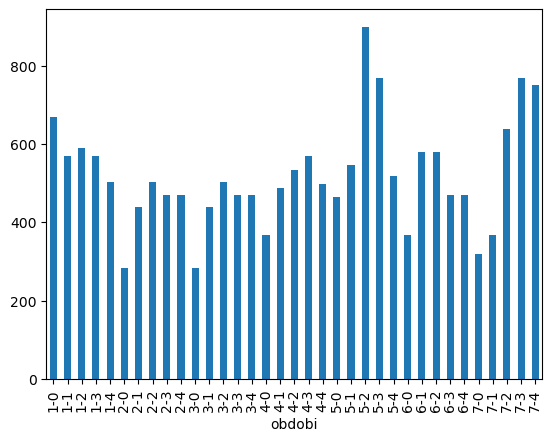

In [10]:
ovaprg.groupby('obdobi')['cena'].median().plot.bar()

In [11]:
df[df['odkud'].str.contains('Pra')].groupby('obdobi')['volnych_mist'].median().nsmallest(10)

obdobi
7-3     4.0
5-3    17.0
5-2    20.0
7-4    20.0
5-4    23.0
4-3    23.5
6-1    25.0
3-3    31.0
7-5    32.0
4-5    32.5
Name: volnych_mist, dtype: float64

In [12]:
df[df['odkud'].str.contains('Ostra')].groupby('obdobi')['volnych_mist'].median().nsmallest(10)

obdobi
7-3    12.0
5-1    14.5
7-4    15.0
5-3    18.0
5-2    19.0
3-2    29.0
4-2    29.0
4-3    29.5
7-2    30.0
1-0    31.0
Name: volnych_mist, dtype: float64

In [13]:
df[df['odkud'].str.contains('Pra')].groupby('obdobi')['cena'].median().nlargest(10)

obdobi
4-5    799.0
5-3    744.0
7-3    744.0
7-5    701.5
5-2    689.0
5-4    644.0
5-5    639.0
7-4    639.0
7-2    619.0
5-1    606.5
Name: cena, dtype: float64

In [14]:
df[df['odkud'].str.contains('Ostra')].groupby('obdobi')['cena'].median().nlargest(10)

obdobi
5-2    899.0
5-3    769.0
7-3    769.0
7-4    751.5
1-0    669.0
7-2    639.0
1-2    589.0
6-1    579.0
6-2    579.0
1-1    570.0
Name: cena, dtype: float64

In [15]:
df.groupby('obdobi')['cena'].median().nlargest(10)

obdobi
4-5    799.0
5-3    769.0
7-3    759.0
7-5    701.5
5-2    689.0
1-0    669.0
7-4    654.0
5-5    639.0
7-2    639.0
5-4    619.0
Name: cena, dtype: float64

In [16]:
df[df['prodejce'].isin(['RJ','LE'])].groupby('obdobi')['volnych_mist'].quantile(0.33).nsmallest(20)

obdobi
7-3     2.00
5-3     6.50
5-2     7.51
5-1    10.55
7-4    11.00
4-3    20.87
5-4    21.98
7-2    27.08
3-2    30.00
3-3    30.00
4-2    30.00
7-5    30.00
1-0    30.32
4-5    31.00
6-2    31.00
5-5    31.83
3-5    33.00
6-1    33.63
1-2    33.76
2-0    34.81
Name: volnych_mist, dtype: float64

In [17]:
df[df['prodejce'].isin(['RJ','LE'])].groupby('obdobi')['volnych_mist'].quantile(0.33).nsmallest(10)

obdobi
7-3     2.00
5-3     6.50
5-2     7.51
5-1    10.55
7-4    11.00
4-3    20.87
5-4    21.98
7-2    27.08
3-2    30.00
3-3    30.00
Name: volnych_mist, dtype: float64

In [18]:
spicka = df[df['prodejce'].isin(['RJ','LE'])].groupby('obdobi')['volnych_mist'].quantile(0.33).nsmallest(4).index.to_list()

In [19]:
df = pd.read_parquet(os.path.join('data','jizdenky.parquet'))
df = df[df['odkud'].str.contains('Ostrava') | df['odkud'].str.contains('Praha')]
df = df[df['kam'].str.contains('Ostrava') | df['kam'].str.contains('Praha')]
df = df[df['odjezd'] >= '2024-11-08']
df = df[df['prostredek'] != 'autobus']
df = df[df['prestupy'] == 0]
nejdelsi = df['jizdni_doba'].quantile(0.95)
print(f"Nejdelší započítané spojení: {int(nejdelsi)} minut.")
df = df[df['jizdni_doba'] <= nejdelsi]
df['spoj'] = df.apply(lambda row: f"""{row['prodejce']} {row['den']} {row['odjezd'].hour:02}:{row['odjezd'].minute:02}""", axis=1)
df['obdobi'] = df.apply(lambda row: obdobi(row), axis=1)

Nejdelší započítané spojení: 216 minut.


"Pro srovnání: střední cena jízdenky poptávané kdykoliv během týdne do 24 hodin před odjezdem je …"

In [21]:
df[(df['predstih_h'] <= 24) & (df['odjezd'] >= '2024-11-11') & (df['odjezd'] <= '2024-11-24')]['cena'].median()

504.0

In [22]:
(df.groupby(['spoj','kam'])['cena'].max() / df.groupby(['spoj','kam'])['cena'].min()).dropna().nlargest(10)

C:\Users\micha\AppData\Local\Temp\ipykernel_27568\4213510884.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df.groupby(['spoj','kam'])['cena'].max() / df.groupby(['spoj','kam'])['cena'].min()).dropna().nlargest(10)
C:\Users\micha\AppData\Local\Temp\ipykernel_27568\4213510884.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df.groupby(['spoj','kam'])['cena'].max() / df.groupby(['spoj','kam'])['cena'].min()).dropna().nlargest(10)


spoj         kam           
LE ne 10:58  Ostrava hl.n.     7.767677
             Ostrava-Svinov    7.767677
LE čt 13:58  Ostrava hl.n.     5.581006
             Ostrava-Svinov    5.413408
LE ne 07:58  Ostrava hl.n.     5.040404
             Ostrava-Svinov    5.040404
LE ne 08:58  Ostrava hl.n.     5.040404
             Ostrava-Svinov    5.040404
LE po 17:06  Praha hl.n.       5.040404
LE po 17:13  Praha hl.n.       5.040404
Name: cena, dtype: float64

In [23]:
df = df[df['predstih_h'] >= 0]

In [24]:
df['predstih_d2'] = df['predstih_h'] / 24

In [25]:
df.sample(10)

,oscrapovano,prodejce,odkud,kam,odjezd,predstih,predstih_d,predstih_h,cena,prostredek,volnych_mist,obsazenost,jizdni_doba,vzdalenost,zpozdeni,cena_poznamka,den,prestupy,vlaky,mistenka_zdarma,nahradni_bus,volna_mista_economy,volna_mista_economy_plus,volna_mista_economy_business,volna_mista_premium,spoj,obdobi,predstih_d2
793283,2024-11-24 13:51:40,ČD,Ostrava hl.n.,Praha hl.n.,2024-12-08 08:12:00,13 days 18:20:20,13,330.338889,569.0,vlak,NaN,[Předpokládané střední obsazení - doporučujeme...,202.0,356.0,[0],None,ne,0,[EC 144 Ostravan],True,None,NaN,NaN,NaN,NaN,ČD ne 08:12,7-2,13.764120
694472,2024-11-21 21:47:38,ČD,Praha hl.n.,Ostrava hl.n.,2024-11-30 13:32:00,8 days 15:44:22,8,207.739444,504.0,vlak,NaN,[Předpokládané střední obsazení - doporučujeme...,192.0,356.0,[0],None,so,0,[SC 507 Pendolino],None,None,NaN,NaN,NaN,NaN,ČD so 13:32,6-3,8.655810
486942,2024-11-16 16:18:52,LE,Praha hl.n.,Ostrava-Svinov,2024-11-20 11:00:00,3 days 18:41:08,3,90.685556,299.0,None,51.0,None,204.0,351.0,None,None,st,0,[LE1257],None,None,21.0,18.0,11.0,1.0,LE st 11:00,3-2,3.778565
794919,2024-11-24 14:14:13,RJ,Praha,Ostrava,2024-11-25 13:50:00,0 days 23:35:47,0,23.596389,319.0,vlak,177.0,None,191.0,NaN,None,None,po,0,None,None,None,NaN,NaN,NaN,NaN,RJ po 13:50,1-3,0.983183
437456,2024-11-15 11:39:28,ČD,Ostrava hl.n.,Praha hl.n.,2024-11-18 05:10:00,2 days 17:30:32,2,65.508889,719.0,vlak,NaN,[Předpokládané vysoké obsazení - doporučujeme ...,189.0,356.0,[0],None,po,0,[SC 516 Pendolino],None,None,NaN,NaN,NaN,NaN,ČD po 05:10,1-1,2.729537
290953,2024-11-11 18:40:56,ČD,Ostrava hl.n.,Praha hl.n.,2024-11-16 06:02:00,4 days 11:21:04,4,107.351111,469.0,vlak,NaN,[Předpokládané střední obsazení - doporučujeme...,212.0,356.0,[0],None,so,0,[IC 546 Ostravan],True,None,NaN,NaN,NaN,NaN,ČD so 06:02,6-1,4.472963
428901,2024-11-15 06:25:05,LE,Ostrava-Svinov,Praha hl.n.,2025-01-06 15:05:00,52 days 08:39:55,52,1256.665278,199.0,None,67.0,None,202.0,351.0,None,None,po,0,[LE1260],None,None,21.0,21.0,19.0,6.0,LE po 15:05,1-3,52.361053
151333,2024-11-08 11:40:16,ČD,Praha hl.n.,Ostrava hl.n.,2024-11-13 15:32:00,5 days 03:51:44,5,123.862222,504.0,vlak,NaN,[Předpokládané nízké obsazení],192.0,356.0,[0],None,st,0,[IC 511 Ostravan],None,None,NaN,NaN,NaN,NaN,ČD st 15:32,3-3,5.160926
635204,2024-11-20 11:37:01,ČD,Praha hl.n.,Ostrava hl.n.,2024-11-23 09:32:00,2 days 21:54:59,2,69.916389,605.0,vlak,NaN,[Předpokládané střední obsazení - doporučujeme...,192.0,356.0,[0],None,so,0,[SC 503 Pendolino],None,None,NaN,NaN,NaN,NaN,ČD so 09:32,6-2,2.913183
817355,2024-11-25 05:19:48,RJ,Ostrava,Praha,2024-11-25 12:53:00,0 days 07:33:12,0,7.553333,369.0,vlak,79.0,None,194.0,NaN,None,None,po,0,None,None,None,NaN,NaN,NaN,NaN,RJ po 12:53,1-3,0.314722


In [69]:
def dopravce(dopr):
    if dopr == "ČD":
        dlouhe = "České dráhy"
    elif dopr == "RJ":
        dlouhe = "RegioJet"
    elif dopr == "LE":
        dlouhe = "Leo Express"
    x = df[df['obdobi'].isin(spicka) & (df['predstih_d'] <= 60) & (df['prodejce'] == dopr)].groupby(['predstih_d','cena']).size().reset_index()
    x = x[['predstih_d','cena', 0]].values.tolist()
    x = pd.Series(x, name=dlouhe)
    x.index = x.index.map(lambda x: f"{x} d")
    return x

In [71]:
cd = dopravce("ČD")
le = dopravce("LE")
rj = dopravce("RJ")

<Axes: xlabel='predstih_d2', ylabel='cena'>

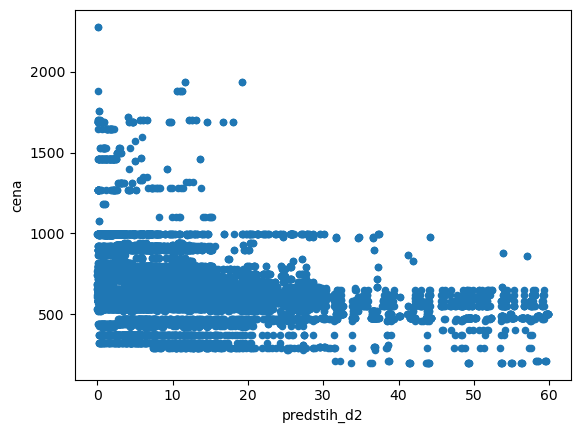

In [28]:
df[df['obdobi'].isin(spicka) & (df['predstih_d2'] <= 60)][['prodejce','predstih_d2','cena']].plot.scatter(x='predstih_d2', y='cena')

In [29]:
cd

0 d       [0.0, 369.0, 4.0]
1 d      [0.0, 425.0, 12.0]
2 d      [0.0, 535.0, 29.0]
3 d       [0.0, 569.0, 8.0]
4 d      [0.0, 604.0, 64.0]
                ...        
506 d    [30.0, 609.0, 1.0]
507 d    [30.0, 619.0, 1.0]
508 d    [30.0, 639.0, 2.0]
509 d    [30.0, 649.0, 2.0]
510 d    [30.0, 659.0, 1.0]
Name: České dráhy, Length: 511, dtype: object

Strašlivá ad hoc úprava funkce pro generování grafu:

In [31]:
def irozhlas_graf(
    carovy=[],
    sloupcovy=[],
    vodorovny=[],
    scatter=[],
    procenta=[],
    skryte=[],
    barvy=[],
    histogram=False,
    max_procenta=100,
    target="",
    titulek="",
    podtitulek="",
    naproti=[],
    osay=" ",
    osay2=" ",
    osaymin=None,
    osaymax=None,
    kredity=["zdroj dat a autorstvo", "url odkazu"],
    zaokrouhleni=1,
    prvni=True,
    skladany=False,
    naopak=False,
    vzhurunohama=False,
    skrytnuly=False,
):
    """
    Funkce vygeneruje HighCharts graf z pandas Series (jedné nebo více).

    iROZHLAS-friendly barvy:
    - "#b2e061" světle zelená
    - "#7eb0d5" světle modrá
    - "#fd7f6f" světle červená
    - "#bd7ebe" světle fialová
    - "#ffb55a" oranžová
    - "#ffee65" žlutá
    - "#beb9db" levandulová
    - "#fdcce5" skoro černá
    - "#8bd3c7" světle tyrkysová
    """

    import os
    import pandas as pd
    from highcharts_core.chart import Chart
    from highcharts_core.options.series.area import LineSeries
    from highcharts_core.options.series.bar import ColumnSeries
    from highcharts_core.options.series.bar import BarSeries
    from highcharts_core.options.series.histogram import HistogramSeries
    from highcharts_core.options.series.bubble import BubbleSeries
    from highcharts_core.options.plot_options.scatter import ScatterOptions
    from highcharts_core.options.plot_options.bubble import BubbleOptions
    from highcharts_core.options.series.scatter import ScatterSeries
    from highcharts_core.options.legend import Legend
    from highcharts_core.options.title import Title
    from highcharts_core.options.subtitle import Subtitle
    from highcharts_core.options.credits import Credits

    nastaveni = {}

    if prvni:
        zdrojaky = f"""<script src="https://code.highcharts.com/highcharts.js"></script><script src="https://code.highcharts.com/highcharts-more.js"></script>
<script src="https://code.highcharts.com/modules/exporting.js"></script>
<script src="https://code.highcharts.com/modules/export-data.js"></script>
<script src="https://code.highcharts.com/modules/accessibility.js"></script>
<link
  rel="stylesheet"
  href="https://fonts.googleapis.com/css?family=Noticia+Text"
/>
<link
  href="https://fonts.googleapis.com/css2?family=Asap"
  rel="stylesheet"
/>
<link
  href="https://fonts.googleapis.com/css2?family=Roboto"
  rel="stylesheet"
/>

<link
  rel="stylesheet"
  href="https://data.irozhlas.cz/hhighcharts-template/style.css"
/>
<link
  rel="stylesheet"
  href="https://data.irozhlas.cz/hhighcharts-template/highcharts-style.css"
/>
<style type="text/css">text{{font-family:"Asap"!important}}.paragraph{{font-family:"Noticia text"!important}}.href{{color:#666;fill:#666}}.highcharts-title{{font-family:"Noticia text"!important;font-weight:700!important;text-align:left!important;left:10px!important}}.highcharts-subtitle{{text-align:left!important;font-size:.95rem!important;left:10px!important;font-family:"Asap"!important}}.highcharts-data-labels text{{font-size:.85rem!important}}.highcharts-axis-labels text{{font-size:.85rem!important}}text.highcharts-plot-line-label{{font-size:.85rem!important;fill:#666}}text.highcharts-plot-band-label{{font-size:.85rem!important;fill:#666}}text.highcharts-credits{{font-size:.75rem!important}}.highcharts-tooltip span{{font-family:"Asap"!important}}.axis-label-on-tick{{fill:#aaa;color:#aaa}}.mock-empty-line{{fill:#fff;color:#fff}}</style>"""
    else:
        zdrojaky = ""

    pred = f"""{zdrojaky}
        <figure id="{target}">
        <div id="container"></div>
        </figure>
        <script>"""

    if len(carovy) > 0:
        categories = carovy[0].index.to_list()
    if len(sloupcovy) > 0:
        categories = sloupcovy[0].index.to_list()
    if len(vodorovny) > 0:
        categories = vodorovny[0].index.to_list()
    if len(scatter) > 0:
        categories = scatter[0].index.to_list()

    categories = [str(x) for x in categories]
    
    nastaveni["xAxis"] = {"categories": categories, "min": 0, "title": {"text": "předstih nákupu"}}
    nastaveni["yAxis"] = [
        {
            "title": {"text": osay},
            "reversed": vzhurunohama,
            "max": osaymax,
            "min": osaymin,
        }
    ]

    if skladany:
        if len(sloupcovy) > 0:
            nastaveni["plotOptions"] = {"column": {"stacking": "normal"}}
        if len(vodorovny) > 0:
            nastaveni["plotOptions"] = {"bar": {"stacking": "normal"}}
    if histogram:
        nastaveni["plotOptions"] = {
            "column": {
                "pointPadding": 0,
                "borderWidth": 0,
                "groupPadding": 0,
                "shadow": False,
            }
        }

    if len(procenta) > 0:
        osa_procent = {
            "title": {"text": osay2},
            "max": max_procenta,
            "min": 0,
            "labels": {"format": "{value} %"},
        }

        if len(procenta) != len(carovy) + len(sloupcovy):
            osa_procent["opposite"] = True
            druha_osa = 1
            nastaveni["yAxis"].append(osa_procent)
            nastaveni["alignTicks"] = False
        if len(procenta) == len(carovy) + len(sloupcovy):
            nastaveni["yAxis"] = [osa_procent]
            druha_osa = 0

    if len(naproti) > 0:
        druha_osa = 1
        druha_osa_y = {
            "title": {"text": osay2},
            "opposite": True,
            "max": naproti[0].max(),
            "min": 0,
        }
        nastaveni["yAxis"].append(druha_osa_y)

    my_chart = Chart(container=target, options=nastaveni)

    procenta = [p.name for p in procenta]
    naproti = [n.name for n in naproti]
    skryte = [s.name for s in skryte]

    def vykresleni(serie, typ):
        for s in serie:
            popisek = s.name

            if s.name in skryte:
                viditelnost = False
            else:
                viditelnost = True

            ktera_osa = 0
            if s.name in naproti:
                ktera_osa = druha_osa

            if s.name in procenta:
                s = [round(x * 100, zaokrouhleni) for x in s.fillna(0).to_list()]
                my_chart.add_series(
                    typ(
                        data=s,
                        visible=viditelnost,
                        name=popisek,
                        y_axis=druha_osa,
                        tooltip={"valueSuffix": " %"},
                    )
                )

            else:
                my_chart.add_series(
                    typ(
                        data=s.fillna(0).to_list(),
                        visible=viditelnost,
                        name=popisek,
                        y_axis=ktera_osa,
                        tooltip = {
				'pointFormat': '{point.x}denní předstih: {point.y} Kč, nabídnuto {point.z}×'
			}
                    )
                )

    if len(sloupcovy) > 0:
        vykresleni(sloupcovy, ColumnSeries)
    if len(carovy) > 0:
        vykresleni(carovy, LineSeries)
    if len(vodorovny) > 0:
        vykresleni(vodorovny, BarSeries)
    if len(scatter) > 0:
        vykresleni(scatter, BubbleSeries)

    if len(barvy) > 0:
        my_chart.options.colors = barvy
    else:
        my_chart.options.colors = colors = [
            "#b2e061",  ## světle zelená (light green)
            "#7eb0d5",  ## světle modrá (light blue)
            "#fd7f6f",  ## světle červená (light red)
            "#bd7ebe",  ## světle fialová (light purple)
            "#ffb55a",  ## oranžová (orange)
            "#ffee65",  ## žlutá (yellow)
            "#beb9db",  ## levandulová (lavender)
            "#fdcce5",  ## skoro černá
            "#8bd3c7",  ## světle tyrkysová (light turquoise)
        ]

    if naopak:
        my_chart.options.legend = Legend(reversed=True)

    my_chart.options.title = Title(text=titulek, align="left", margin=30)

    if len(podtitulek) > 0:
        my_chart.options.subtitle = Subtitle(text=podtitulek, align="left")

    my_chart.options.credits = Credits(text=kredity[0], enabled=True, href=kredity[1])

    as_js_literal = my_chart.to_js_literal()

    if skrytnuly == True:
        as_js_literal = as_js_literal.replace("y: 0.0", "y: null")

    code = f"<html><head><title>{titulek}</title></head><body>{pred}{as_js_literal}</script></body></html>"

    if not os.path.exists("grafy"):
        os.mkdir("grafy")

    with open(os.path.join("grafy", target + ".html"), "w+") as f:
        f.write(code)

    with open(os.path.join("grafy", target + ".txt"), "w+") as f:
        f.write(f"{pred}{as_js_literal}</script>")

        print("Graf uložen.")

In [32]:
spicka

['7-3', '5-3', '5-2', '5-1']

In [73]:
irozhlas_graf(scatter=[cd, rj, le], barvy=["#526d77","#fabb00","#e68014"], target='prgova_bubble', titulek='Jízdné Praha &#8596; Ostrava na začátku a konci víkendu', osaymin=0, podtitulek='Nabízené ceny jízdenek na páteční (8.00-16.00) a nedělní (12.00-20.00) špičku', kredity=['Zdroj dat: e-shopy dopravců od 7. 11. do 26. 11. 2024. Vizualizace: iROZHLAS.cz','https://www.irozhlas.cz/zpravy-tag/datova-zurnalistika'])

Graf uložen.
